In [1]:
import numpy as np
import matplotlib.pyplot as plt
T = 1
delta = 0.01
N = 5
M = 100000

In [2]:
def generate_Q(N,  M, tau):
    ii = 0
    tore = tau*np.sqrt(2/np.pi)
    Q = []
    while ii < M:
        tempQ = 2*tore*np.random.rand(N) - tore
        tempQ = np.array(tempQ)
        if np.linalg.norm(tempQ) <= tore:
            Q = np.append(Q, tempQ)
            ii += 1
    return (Q.reshape(-1, N))

def sol_act(Q, T):
    N = len(Q[0])
    A = np.diag(np.exp(-(np.arange(1, N+1))**2*T))
    F = A@Q.T #A = NxN, Q = MxN, Q.T = NxM , F = NxM
    return F

def noise_data(F, delta):
    e = 2*np.random.rand(len(F[:,0]), len(F[0])) - 1
    N = len(F[:])
    for m in range(len(F[0])):
        norm = np.linalg.norm(F[:,m])
        e[:, m] = e[:, 0]*norm*delta
    nF = F+e
    return nF

def sol_Tik(alpha, T, F):
    N = len(F[:])
    invA = np.diag(1/(alpha*np.exp((np.arange(1, N+1))**2*T)+np.exp(-(np.arange(1, N+1))**2*T))) # A = NxN
    hatQ = invA@F 
    return hatQ

def result_gen_data(N, M, tau, Q, delta):
    #Q = generate_Q(N, M, tau)
    T = 1
    F = sol_act(Q, T)
    nF = noise_data(F, delta)
    np.savetxt('Q1.txt', Q.T, fmt='%8f', delimiter = ',', header='')
    np.savetxt('F1.txt', F, fmt='%8f', delimiter = ',', header='')
    np.savetxt('nF1.txt', nF, fmt='%8f', delimiter = ',', header='')

In [3]:
Q = generate_Q(N, M, tau = 1)
F = sol_act(Q, T)
nF = noise_data(F, delta)
result_gen_data(N, M, tau = 1, Q = Q, delta = 0.01)
Q

array([[-0.0961461 , -0.16424991,  0.18038404,  0.41688054, -0.26994924],
       [-0.61781972,  0.23856541, -0.12291229, -0.10325335, -0.20937362],
       [ 0.01137637,  0.39347394, -0.46457865,  0.33979974,  0.04751796],
       ...,
       [-0.37471043,  0.309845  , -0.37773583,  0.09491097, -0.40888682],
       [-0.14930049, -0.25550041,  0.3368609 , -0.16447492,  0.24901696],
       [ 0.17015645, -0.54063954, -0.16522359, -0.23564614, -0.08862698]])

In [4]:
def result_Lcurve(N, tau, delta, min_al):
    #get data
    M = 1 #one data set
    Q = generate_Q(N, M, tau)
    
    T = 1
    F = sol_act(Q, T)
    nF = noise_data(F, delta)
    
    al = np.linspace(0, min_al, 100)
    q1 = []
    q2 = []
    for ii in range(len(al)):
        q1.append(sol_Tik(10**al[ii], T, F))
        q2.append(sol_Tik(10**al[ii], T, nF))
    q1 = np.array(q1) 
    q2 = np.array(q2)
    
    n = np.arange(1, N+1)
    A = np.diag(np.exp(-n**2*T))
    
    x1 = []
    x2 = []
    y1 = []
    y2 = []

    for i in range(len(al)):
        x1.append(np.linalg.norm(A@q1[i]-F))
        y1.append(np.linalg.norm(q1[i]))
        x2.append(np.linalg.norm(A@q2[i]-nF))
        y2.append(np.linalg.norm(q2[i]))
    
    fig = plt.figure(figsize = (10,10))
    fig.add_subplot(2, 1, 1)
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(x1, y1)
    plt.title("without noise")

    
    fig.add_subplot(2, 1, 2)
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(x2, y2)
    plt.title("with noise")     

    
    plt.savefig('L-curve1')
    return np.array(x1), np.array(y1), np.array(x2), np.array(y2)

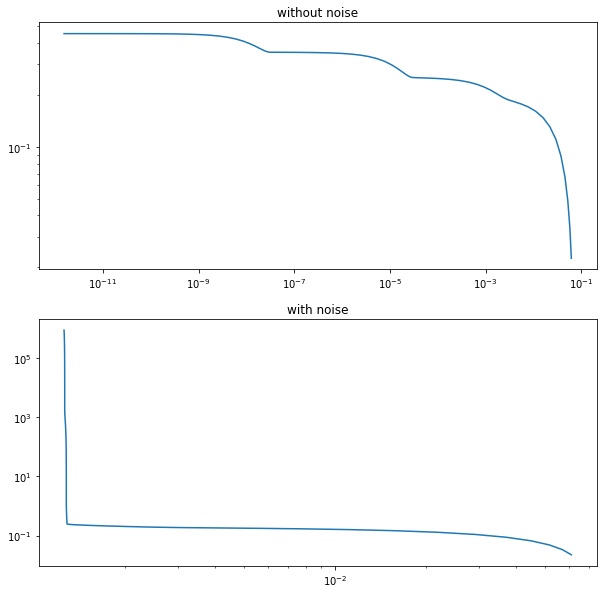

In [5]:
x1, y1, x2, y2 = result_Lcurve(10, 1, 0.01, -20)
x2 = np.flip(x2)
y2 = np.flip(y2)


In [6]:
print(f' x2 : \n {x2}\n \n y2 : \n {y2}')

 x2 : 
 [0.00125661 0.00125889 0.00126035 0.00126127 0.00126186 0.00126223
 0.00126246 0.0012626  0.0012627  0.00126275 0.00126279 0.00126281
 0.00126283 0.00126284 0.00126284 0.00126284 0.00126285 0.00126285
 0.00126285 0.00126285 0.00126285 0.00126285 0.00126286 0.00126287
 0.00126289 0.00126296 0.00126309 0.00126339 0.00126395 0.00126494
 0.00126644 0.00126839 0.00127055 0.00127262 0.00127438 0.00127574
 0.00127672 0.0012774  0.00127784 0.00127814 0.00127832 0.00127844
 0.00127852 0.00127857 0.0012786  0.00127862 0.00127863 0.00127864
 0.00127864 0.00127864 0.00127865 0.00127865 0.00127865 0.00127866
 0.00127867 0.00127869 0.00127875 0.00127888 0.00127913 0.00127957
 0.00128025 0.00128115 0.00128216 0.00128314 0.00128398 0.00128464
 0.00128512 0.00128545 0.00128567 0.00128583 0.00128596 0.0012861
 0.00128636 0.00128693 0.00128831 0.00129163 0.0012995  0.00131754
 0.00135645 0.00143315 0.0015666  0.00176578 0.0020185  0.0022952
 0.00256798 0.00283196 0.003123   0.00353736 0.00425312 

In [7]:
O = np.column_stack((x2, y2))
v = []
for i in range(len(O) - 1):
    v.append(O[i+1]-O[i])
v

[array([ 2.28249836e-06, -3.24244929e+05]),
 array([ 1.45630273e-06, -2.05994792e+05]),
 array([ 9.23760362e-07, -1.30313618e+05]),
 array([ 5.83800655e-07, -8.22141077e+04]),
 array([ 3.68094213e-07, -5.17779064e+04]),
 array([ 2.31748420e-07, -3.25705926e+04]),
 array([ 1.45771982e-07, -2.04683303e+04]),
 array([ 9.16388324e-08, -1.28475962e+04]),
 array([ 5.75873226e-08, -8.04649290e+03]),
 array([ 3.61805563e-08, -5.01451034e+03]),
 array([ 2.27280896e-08, -3.08837230e+03]),
 array([ 1.42763989e-08, -1.85179907e+03]),
 array([ 8.96766063e-09, -1.05204585e+03]),
 array([ 5.63433586e-09, -5.48020607e+02]),
 array([ 3.54384038e-09, -2.58086864e+02]),
 array([ 2.23880154e-09, -1.12287620e+02]),
 array([ 1.43922774e-09, -4.72530023e+01]),
 array([ 9.87697096e-10, -2.06618006e+01]),
 array([ 8.31607401e-10, -1.08925028e+01]),
 array([ 1.05323370e-09, -8.55848144e+00]),
 array([ 1.98867245e-09, -1.00843837e+01]),
 array([ 4.53913503e-09, -1.44996688e+01]),
 array([ 1.09017243e-08, -2.2086

In [8]:
cos = []
#array([-0.00443861,  0.01208635]) = v[0]
for i in range(len(v)-1):
    v1_norm = np.linalg.norm(v[i])
    v2_norm = np.linalg.norm(v[i+1])
    v_cos = np.dot(v[i], v[i+1])/(v1_norm*v2_norm)
    cos.append(v_cos)
a = np.argmin(cos)
a

86

In [36]:
min_al = -20
al = np.linspace(0, min_al, 100)
alpha = 10**al[a]
alpha

4.229242874389499e-18

In [37]:
hatQ = sol_Tik(alpha, T, F)
nF = noise_data(F, delta = delta)

In [25]:
hatQ
np.savetxt('hatQ.txt', hatQ, fmt='%8f', delimiter = ',', header='')

In [38]:
Q.T

array([[-0.0961461 , -0.61781972,  0.01137637, ..., -0.37471043,
        -0.14930049,  0.17015645],
       [-0.16424991,  0.23856541,  0.39347394, ...,  0.309845  ,
        -0.25550041, -0.54063954],
       [ 0.18038404, -0.12291229, -0.46457865, ..., -0.37773583,
         0.3368609 , -0.16522359],
       [ 0.41688054, -0.10325335,  0.33979974, ...,  0.09491097,
        -0.16447492, -0.23564614],
       [-0.26994924, -0.20937362,  0.04751796, ..., -0.40888682,
         0.24901696, -0.08862698]])

In [39]:
hatQ

array([[-9.61461047e-02, -6.17819723e-01,  1.13763710e-02, ...,
        -3.74710431e-01, -1.49300493e-01,  1.70156448e-01],
       [-1.64249907e-01,  2.38565413e-01,  3.93473941e-01, ...,
         3.09844997e-01, -2.55500406e-01, -5.40639545e-01],
       [ 1.80384035e-01, -1.22912291e-01, -4.64578653e-01, ...,
        -3.77735830e-01,  3.36860899e-01, -1.65223594e-01],
       [ 4.16741369e-01, -1.03218881e-01,  3.39686302e-01, ...,
         9.48792806e-02, -1.64420014e-01, -2.35567468e-01],
       [-1.23104971e-05, -9.54806654e-06,  2.16696162e-06, ...,
        -1.86464684e-05,  1.13559219e-05, -4.04165667e-06]])

In [40]:
F

array([[-3.53701753e-02, -2.27283174e-01,  4.18513302e-03, ...,
        -1.37848264e-01, -5.49245820e-02,  6.25970590e-02],
       [-3.00834198e-03,  4.36947795e-03,  7.20672662e-03, ...,
         5.67500908e-03, -4.67965317e-03, -9.90215867e-03],
       [ 2.22611584e-05, -1.51685818e-05, -5.73335605e-05, ...,
        -4.66163048e-05,  4.15719375e-05, -2.03902114e-05],
       [ 4.69137246e-08, -1.16196339e-08,  3.82394233e-08, ...,
         1.06808221e-08, -1.85092142e-08, -2.65184791e-08],
       [-3.74903996e-12, -2.90776910e-12,  6.59926699e-13, ...,
        -5.67859726e-12,  3.45833353e-12, -1.23084651e-12]])

In [41]:
nF

array([[-3.54798001e-02, -2.27283424e-01,  4.18512389e-03, ...,
        -1.37848415e-01, -5.49246424e-02,  6.25969895e-02],
       [-3.32237662e-03,  4.36876407e-03,  7.20670045e-03, ...,
         5.67457582e-03, -4.67982628e-03, -9.90235769e-03],
       [-8.72265859e-05, -1.54174750e-05, -5.73426852e-05, ...,
        -4.67673596e-05,  4.15115839e-05, -2.04595997e-05],
       [ 1.59832058e-04,  3.51612221e-07,  5.15559151e-08, ...,
         2.31128458e-07,  6.95700996e-08,  7.47460410e-08],
       [-1.91848692e-04, -4.36123270e-07, -1.59880073e-08, ...,
        -2.64689795e-07, -1.05750433e-07, -1.21586160e-07]])

In [42]:
np.linalg.cond(hatQ)

22000.71012496892

In [43]:
nF.shape

(5, 100000)

In [44]:
np.linalg.norm(Q.T-hatQ)

95.35715243227611

In [33]:
hatQ.shape

(5, 100000)

In [48]:
al = 10**al
al

array([10.        ,  4.2464806 ,  2.47982256,  1.76891773,  1.43076272,
        1.25227871,  1.15175226,  1.09278641,  1.05730743,  1.03561686,
        1.02222261,  1.01389935,  1.00870677,  1.00545929,  1.00342512,
        1.00214971,  1.00134954,  1.00084734,  1.00053207,  1.00033412,
        1.00020982,  1.00013177,  1.00008275,  1.00005197,  1.00003264,
        1.0000205 ,  1.00001287,  1.00000808,  1.00000508,  1.00000319,
        1.000002  ,  1.00000126,  1.00000079,  1.0000005 ,  1.00000031,
        1.0000002 ,  1.00000012,  1.00000008,  1.00000005,  1.00000003,
        1.00000002,  1.00000001,  1.00000001,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [35]:
O

array([[1.25661180e-03, 8.82258016e+05],
       [1.25889430e-03, 5.58013087e+05],
       [1.26035060e-03, 3.52018295e+05],
       [1.26127436e-03, 2.21704678e+05],
       [1.26185816e-03, 1.39490570e+05],
       [1.26222625e-03, 8.77126635e+04],
       [1.26245800e-03, 5.51420709e+04],
       [1.26260378e-03, 3.46737406e+04],
       [1.26269541e-03, 2.18261444e+04],
       [1.26275300e-03, 1.37796515e+04],
       [1.26278918e-03, 8.76514118e+03],
       [1.26281191e-03, 5.67676888e+03],
       [1.26282619e-03, 3.82496981e+03],
       [1.26283515e-03, 2.77292397e+03],
       [1.26284079e-03, 2.22490336e+03],
       [1.26284433e-03, 1.96681650e+03],
       [1.26284657e-03, 1.85452888e+03],
       [1.26284801e-03, 1.80727587e+03],
       [1.26284900e-03, 1.78661407e+03],
       [1.26284983e-03, 1.77572157e+03],
       [1.26285088e-03, 1.76716309e+03],
       [1.26285287e-03, 1.75707870e+03],
       [1.26285741e-03, 1.74257904e+03],
       [1.26286831e-03, 1.72049218e+03],
       [1.262894

In [49]:
Q.T.shape

(5, 100000)